In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")



## Load the dataset

In [2]:
df = pd.read_csv('../data/amazon_sales_data 2025.csv')

In [3]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [5]:
df.describe(include='all')

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
count,250,250,250,250,250.000000,250.000000,250.000000,250,250,250,250
unique,250,60,10,5,NaN,NaN,NaN,10,10,5,3
top,ORD0001,10-02-25,Smartphone,Electronics,NaN,NaN,NaN,Emma Clark,Houston,PayPal,Completed
freq,1,10,35,118,NaN,NaN,NaN,32,32,60,88
mean,NaN,NaN,NaN,NaN,343.580000,2.856000,975.380000,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,380.635808,1.429489,1252.112254,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,15.000000,1.000000,15.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,2.000000,100.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,150.000000,3.000000,400.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,600.000000,4.000000,1500.000000,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

## Top-selling products

In [8]:
df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(10)

Product
Refrigerator       78000
Laptop             58400
Smartphone         48500
Washing Machine    27000
Smartwatch         15750
Headphones          7300
Running Shoes       4320
Jeans               2480
T-Shirt             1060
Book                1035
Name: Total Sales, dtype: int64

## Which categories bring the most revenue

In [10]:
df.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)

Category
Electronics        129950
Home Appliances    105000
Footwear             4320
Clothing             3540
Books                1035
Name: Total Sales, dtype: int64

In [42]:
df['Payment Method'].value_counts()

Payment Method
PayPal         60
Credit Card    54
Debit Card     53
Gift Card      42
Amazon Pay     41
Name: count, dtype: int64

In [43]:
df.groupby('Category')['Price'].mean().sort_values(ascending=False)

Category
Home Appliances    960.000000
Electronics        375.423729
Footwear            60.000000
Clothing            30.000000
Books               15.000000
Name: Price, dtype: float64

<Axes: xlabel='Quantity', ylabel='Total Sales'>

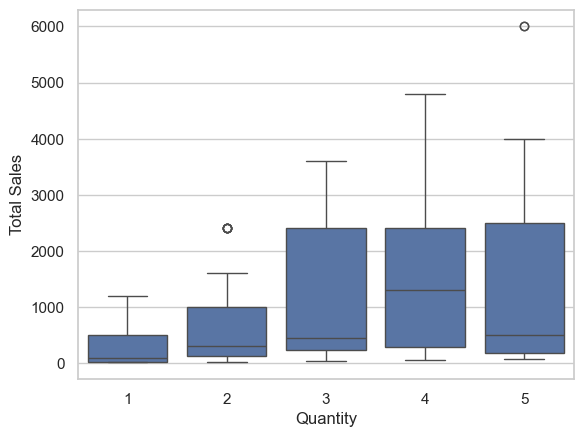

In [14]:
sns.boxplot(x='Quantity', y='Total Sales', data=df)


## Top Products by Total Sales

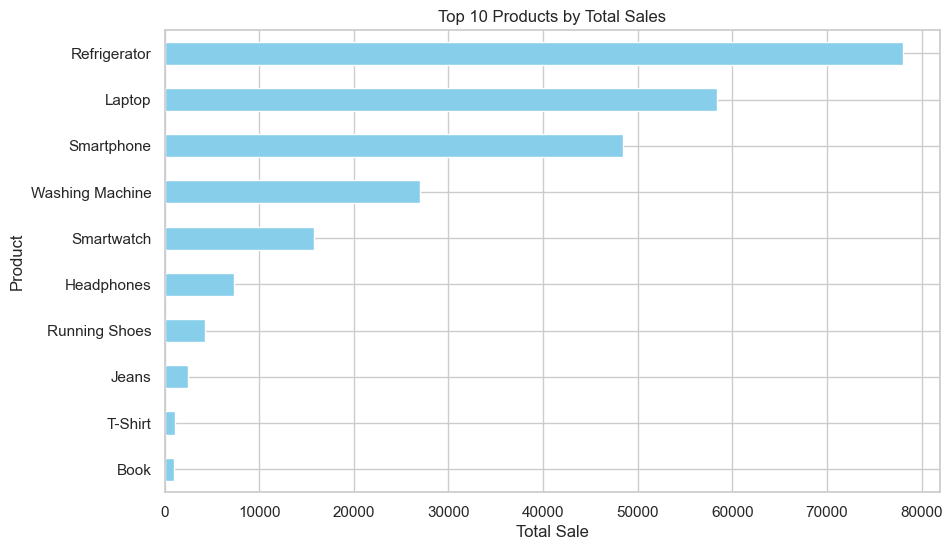

In [47]:
top_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(10)
top_product.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('Total Sale')
plt.title('Top 10 Products by Total Sales')
plt.gca().invert_yaxis() #Put best seller on top
plt.show()

## Top Categories by Total Sales

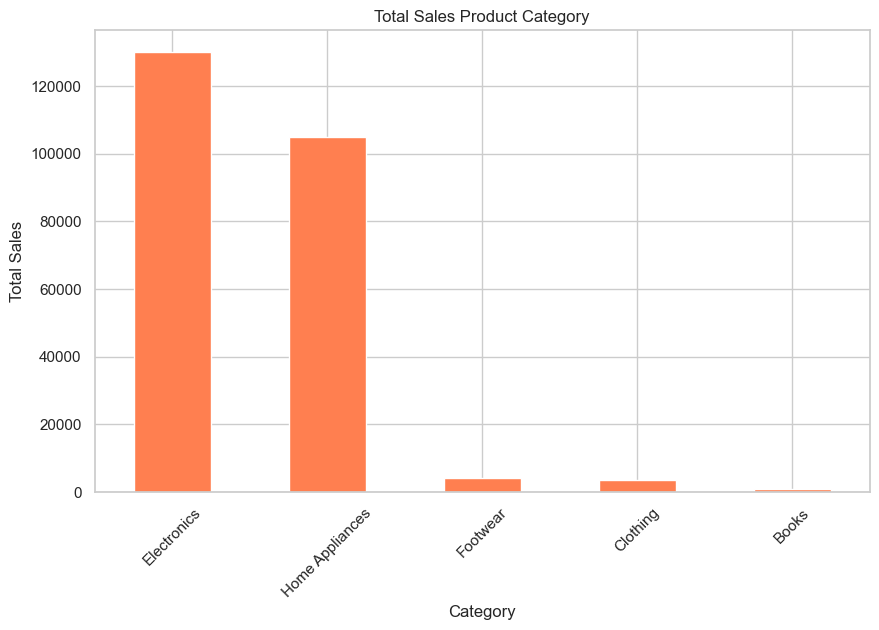

In [50]:
top_categories = df.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)
top_categories.plot(kind='bar', figsize=(10, 6), color='coral')
plt.ylabel('Total Sales')
plt.title('Total Sales Product Category')
plt.xticks(rotation=45)
plt.show()

## Payment Method vs Total Sales

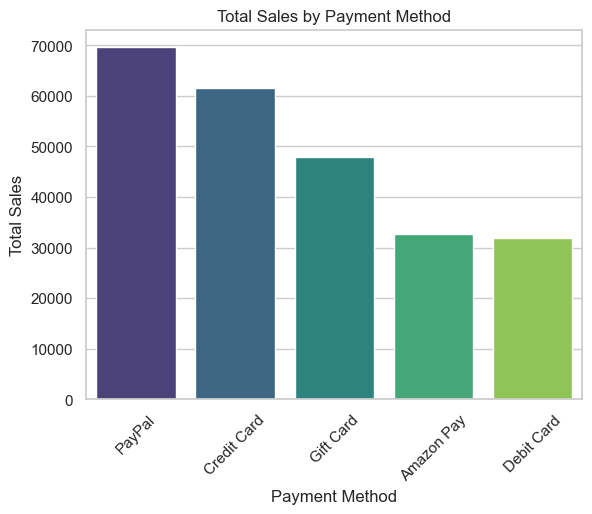

In [56]:
# Convert to DataFrame
payment_df = payment_sales.reset_index()
payment_df.columns = ['Payment Method', 'Total Sales']

# Plot with recommended approach
sns.barplot(data=payment_df, x='Payment Method', y='Total Sales', hue='Payment Method', palette='viridis', legend=False)
plt.title('Total Sales by Payment Method')
plt.ylabel('Total Sales')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.show()


## Top locations by total sales

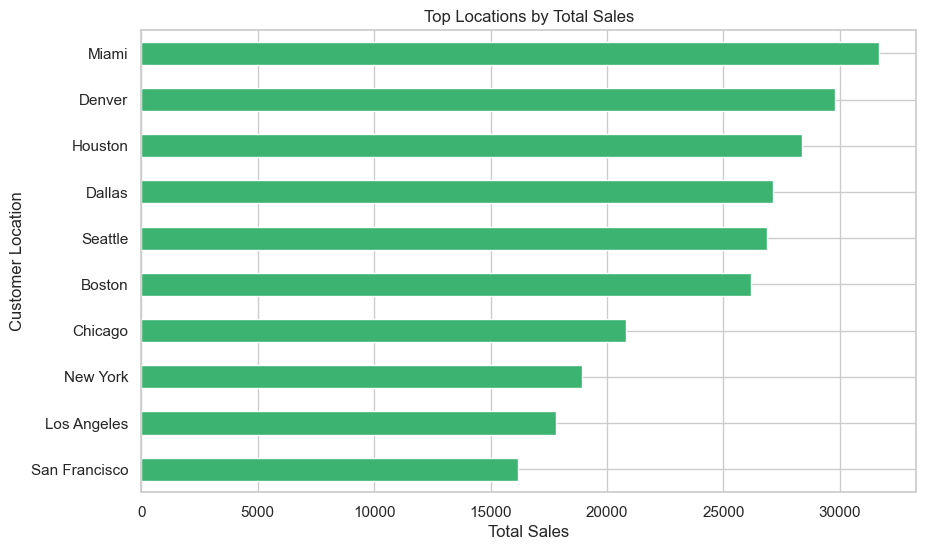

In [58]:
location_sales = df.groupby('Customer Location')['Total Sales'].sum().sort_values(ascending=False).head(10)
location_sales.plot(kind='barh', figsize=(10, 6), color='mediumseagreen')
plt.title('Top Locations by Total Sales')
plt.xlabel('Total Sales')
plt.gca().invert_yaxis()
plt.show()

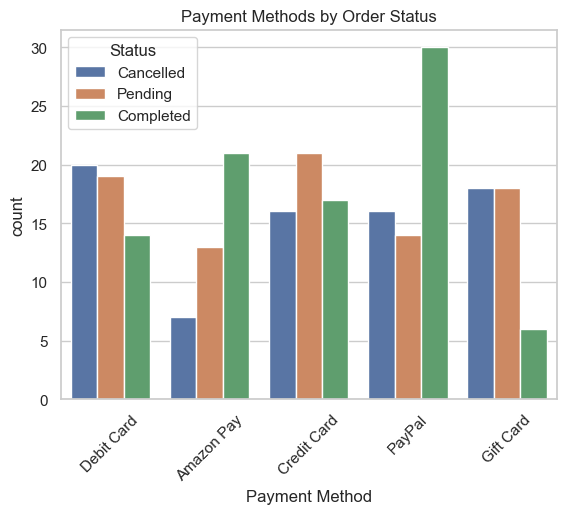

In [59]:
sns.countplot(data=df, x='Payment Method', hue='Status')
plt.title('Payment Methods by Order Status')
plt.xticks(rotation=45)
plt.show()
